# Fit a Lognormal Distribution
- Fit a PDF to a Lognormal distribution comparing to Beta and Triangle
- Data of top 100 US fields is from the IEA:
- https://www.eia.gov/naturalgas/crudeoilreserves/top100/
- **<u>Main Chapters:<u>**
-   Raw Data
-   Create Lognormal Distribution
-   Compare Lognormal to Beta and Triangle Distributions
-   Compare Weibull Distribution
-   Compare Lognormal PDFs fitted to Beta, Triangle and Raw Data
-   Summary Tables
-   Summary Box and Whisker plot
-   Summarize the effect of Beta's dispersion parameter (lambda) on distributions   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# SET GLOBAL STYLE PARAMETERS
plt.style.use('ggplot') # This is a global setting
plt.rcParams["figure.figsize"]=8,6  #10 x 8 is default figure size in Jupyter Notebook
plt.rcParams.update({'font.size': 12})

In [2]:
# Create a function to do descriptive statistics
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    
    # Find the mode (ml) using a detailed histogram
    n, bins, patches=plt.hist(var, bins=500, edgecolor='gray', density=True, alpha=.2)
    plt.close()
    mode_index = n.argmax()
    mode=(bins[mode_index] + bins[mode_index+1])/2
    #############################################
    print('Descriptive Statistics')
    print('mean:   ','{: ,.4f}'.format(np.mean(var)))
    print('median: ','{: ,.4f}'.format(np.median(var)))
    print('mode:   ','{: ,.4f}'.format(mode))
    print('sem:    ','{: ,.4f}'.format(stats.sem(var)))
    print('min:    ','{: ,.4f}'.format(np.min(var)))
    print('max:    ','{: ,.4f}'.format(np.max(var)))
    print('stdev:  ','{: ,.4f}'.format(np.std(var)))
    print('skew:   ','{: ,.4f}'.format(skew(var)))
    print('kurt:   ','{: ,.4f}'.format(kurtosis(var)))
    print('p05:    ','{: ,.4f}'.format(np.percentile(var,5)))
    print('p95:    ','{: ,.4f}'.format(np.percentile(var,95)))
    print('count:  ','{: ,.4f}'.format(np.count_nonzero(var)))


## Raw Data: USA top 100 fields Reserves

In [5]:
oeb=[238050,99787,79080,47259,62046,29487,15833,19996,23703,27346,19587,11665,25793,18291,28766,25494,1187,8492,
   17587,19396,15880,12922,35280,8930,13801,24808,23832,5452,3782,7825,307,4912,11793,5335,13496,6424,4051,5498,
   4011,7106,23360,8186,14306,7277,3694,10242,2476,5755,6116,3519,4407,7229,8808,8294,3737,5115,3441,4930,2348,
   4820,8226,3925,4308,3223,2563,6730,7484,21206,3093,3586,5660,5044,10421,2032,3516,3187,2415,3464,5111,4024,4131,
   2733,3840,4010,8247,3378,1790,1937,2270,3319,2251,6151,3325,2326,2096]
koeb=np.array(oeb)

my_stats(koeb)

Descriptive Statistics
mean:     14,035.4947
median:   5,755.0000
mode:     3,397.6590
sem:      2,862.1122
min:      307.0000
max:      238,050.0000
stdev:    27,749.2069
skew:     6.0395
kurt:     43.1201
p05:      2,076.8000
p95:      38,873.7000
count:    95.0000


### Remove Extreme Outlier at 238,050 KBOE

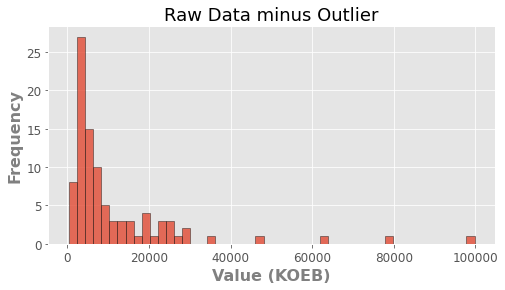

Descriptive Statistics
mean:     11,652.3617
median:   5,707.5000
mode:     3,390.8800
sem:      1,601.9963
min:      307.0000
max:      99,787.0000
stdev:    15,449.0931
skew:     3.4035
kurt:     13.8181
p05:      2,073.6000
p95:      31,514.5500
count:    94.0000


In [6]:
koeb = koeb[koeb < np.max(koeb)] #Remove Extreme Outlier

fig = plt.figure(figsize=(8,4))

plt.hist(koeb, bins=50, edgecolor='k', density=False, alpha=.8, label='Raw Data')
plt.title('Raw Data minus Outlier', fontsize=18)
plt.xlabel('Value (KOEB)', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Frequency', fontsize =16, fontweight='bold', color='gray')
plt.show()
my_stats(koeb)

## Create Lognormal Distribution

### Extract Lognormal Shape Parameters from the Raw Data


In [7]:
#Lognormal Distribution
from scipy.stats import lognorm

# Extract the gamma model shape parameters for the lognormal distribution
shape, loc, scale =lognorm.fit(koeb, floc=0)

print("Lognormal Parameters")
print('Loc (Min):     ', np.round(loc,1))
print('Scale (Mu):    ', np.round(scale,1))
print('Shape (sigma): ', np.round(shape,1),'\n')


Lognormal Parameters
Loc (Min):      0.0
Scale (Mu):     6955.2
Shape (sigma):  1.0 



### Fitted Lognormal Distribution


Evaluate Lognormal Parmaters
Loc (Min):      0.0
Scale (Mu):     6955.2
Shape (sigma):  1.0


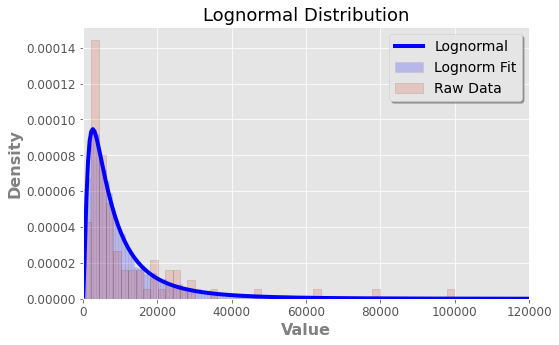

Descriptive Statistics
mean:     11,042.4485
median:   6,908.1431
mode:     3,147.2948
sem:      140.3698
min:      154.2948
max:      427,725.7242
stdev:    14,036.2732
skew:     7.4187
kurt:     134.4007
p05:      1,407.7502
p95:      33,642.2953
count:    10,000.0000


In [8]:
import random

size=10000  # Set sample size for random values

# Create Lognormal Random Values and report shape parameters
lnvals =lognorm.rvs(shape, loc=loc, scale=scale, size=size, random_state=None)

print("Evaluate Lognormal Parmaters")
print('Loc (Min):     ', np.round(loc,1))
print('Scale (Mu):    ', np.round(scale,1))
print('Shape (sigma): ', np.round(shape,1))

# Create a Lognormal PDF
lnmin=np.min(lnvals) # Needed for the x-axis calculation
lnmax=np.max(lnvals) # Needed for the x-axis calculation
lnx = np.linspace(lnmin, lnmax, 1000)
lny = lognorm.pdf(lnx, shape, loc=loc, scale=scale)


# Plot Data
fig = plt.figure(figsize=(8,5))
plt.plot(lnx, lny,lw=4, c='b', alpha=1, label='Lognormal')
plt.hist(lnvals, bins=500, color='b', edgecolor='gray', density=True, alpha=.2, label='Lognorm Fit')
plt.hist(koeb, bins=50, edgecolor='k', density=True, alpha=.2, label='Raw Data')
plt.xlim(0, 120000)

plt.title('Lognormal Distribution', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.legend(fontsize=14, shadow=True)
plt.show()

my_stats(lnvals)

## Exponential Distribution

Exponential Loc=  307
Exponential Scale=  6,955


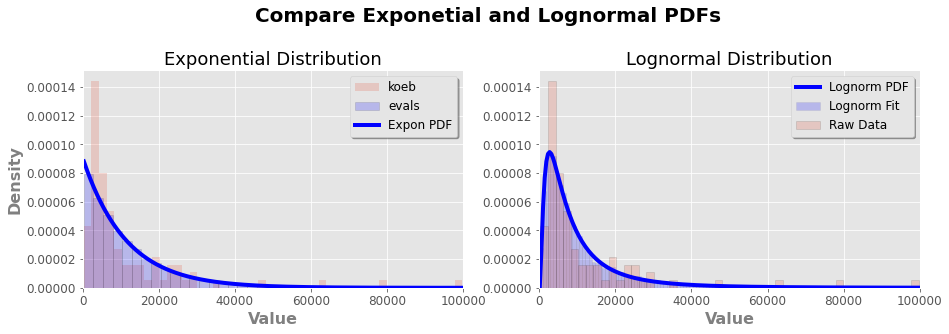

Descriptive Statistics
mean:     11,813.1621
median:   8,215.4769
mode:     685.4232
sem:      117.6226
min:      307.1854
max:      126,386.4348
stdev:    11,761.6720
skew:     2.1848
kurt:     7.5858
p05:      896.4661
p95:      35,093.8595
count:    10,000.0000


In [9]:
from scipy.stats import expon
eloc, escale = expon.fit(koeb)

evals= expon.rvs(loc=eloc, scale=escale, size=10000, random_state=None)

print('Exponential Loc=', '{: ,.0f}'.format(eloc))
print('Exponential Scale=' , '{: ,.0f}'.format(scale))

ex = np.linspace(np.min(evals), np.max(evals), 1000)
ey =expon.pdf(ex, loc=eloc, scale=escale)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,4))
ax1.hist(koeb, bins=50, density=True, alpha=.2, label='koeb')
ax1.hist(evals, bins=50, edgecolor='k', color='b', density=True, alpha=.2, label='evals')
ax1.plot(ex, ey, lw=4, color='b', label='Expon PDF')
ax1.set_title('Exponential Distribution', fontsize=18)
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
ax1.legend(shadow=True)


ax2.plot(lnx, lny,lw=4, c='b', alpha=1, label='Lognorm PDF')
ax2.hist(lnvals, bins=500, color='b', edgecolor='gray', density=True, alpha=.2, label='Lognorm Fit')
ax2.hist(koeb, bins=50, edgecolor='k', density=True, alpha=.2, label='Raw Data')
ax2.set_xlim(0, 100000)
ax2.set_title('Lognormal Distribution', fontsize=18)
ax2.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax2.legend(shadow=True)

plt.suptitle('Compare Exponetial and Lognormal PDFs', fontsize=20, fontweight='bold', y=1.1)


plt.show()
my_stats(evals)